### **K-Means++ Algorithm: Explanation and Pseudocode**  

K-Means++ is an improvement over the traditional **K-Means** algorithm for better centroid initialization. Instead of choosing centroids randomly, K-Means++ ensures that the centroids are **spread out**, leading to **faster convergence** and **better clustering performance**.

---

## **Why K-Means++?**
In standard K-Means:
- Random centroid initialization may result in **bad starting points**, leading to **poor clustering**.
- It may converge to **suboptimal solutions** or take **more iterations** to converge.
  
K-Means++ fixes this by **strategically selecting the initial centroids**, which improves both **speed and accuracy**.

---

## **K-Means++ Algorithm**
1. **Select the first centroid randomly** from the dataset.
2. **For each remaining centroid**:
   - Compute the **distance squared** between each data point and the nearest already chosen centroid.
   - Assign a **probability proportional to this distance**.
   - Select the next centroid **randomly** based on this probability distribution.
3. **Repeat until $ k $ centroids are chosen**.
4. **Run standard K-Means clustering** with these centroids.

---

## **Pseudocode for K-Means++**
```plaintext
K-Means++ Initialization (D, k):

1. Choose the first centroid randomly from the dataset D.
2. Initialize a list for storing the k centroids.
3. Add the first centroid to this list.
4. For the remaining (k - 1) centroids:
   a. Compute the squared distance (D(x)) of each point x to the nearest chosen centroid.
   b. Assign a probability of choosing a point x as a centroid:  
      P(x) = D(x) / sum(D(x)) for all x in D
   c. Choose the next centroid randomly based on these probabilities.
   d. Add the chosen centroid to the list.
5. Once all k centroids are selected, proceed with the standard K-Means algorithm:
   a. Assign each data point to the closest centroid.
   b. Update centroids by computing the mean of assigned points.
   c. Repeat until centroids do not change significantly.
```

---

## **Step-by-Step Example**
### **Given a dataset with 5 points:**  
$
D = \{(1,2), (3,4), (5,6), (8,8), (9,10)\}
$
For **k = 2**:
1. **Randomly pick** one point as the first centroid, say **(3,4)**.
2. **Compute squared distances** of all other points to (3,4):
   - $ (1,2) $ → $ d^2 = 8 $
   - $ (5,6) $ → $ d^2 = 8 $
   - $ (8,8) $ → $ d^2 = 41 $
   - $ (9,10) $→ $ d^2 = 61 $
3. **Assign probabilities**:
   - $ P(1,2) = 8/118 $
   - $ P(5,6) = 8/118 $
   - $ P(8,8) = 41/118 $
   - $ P(9,10) = 61/118 $
4. **Select the second centroid** based on these probabilities.

---

## **Key Benefits of K-Means++**
✅ **Improved Cluster Quality**: Reduces the chances of poor clustering.  
✅ **Faster Convergence**: Reduces the number of iterations needed.  
✅ **More Stable Results**: Less sensitive to initialization randomness.  

---

In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

In [11]:
# let us take a sample dataset
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=1000,
               n_features=2,
               centers=4)

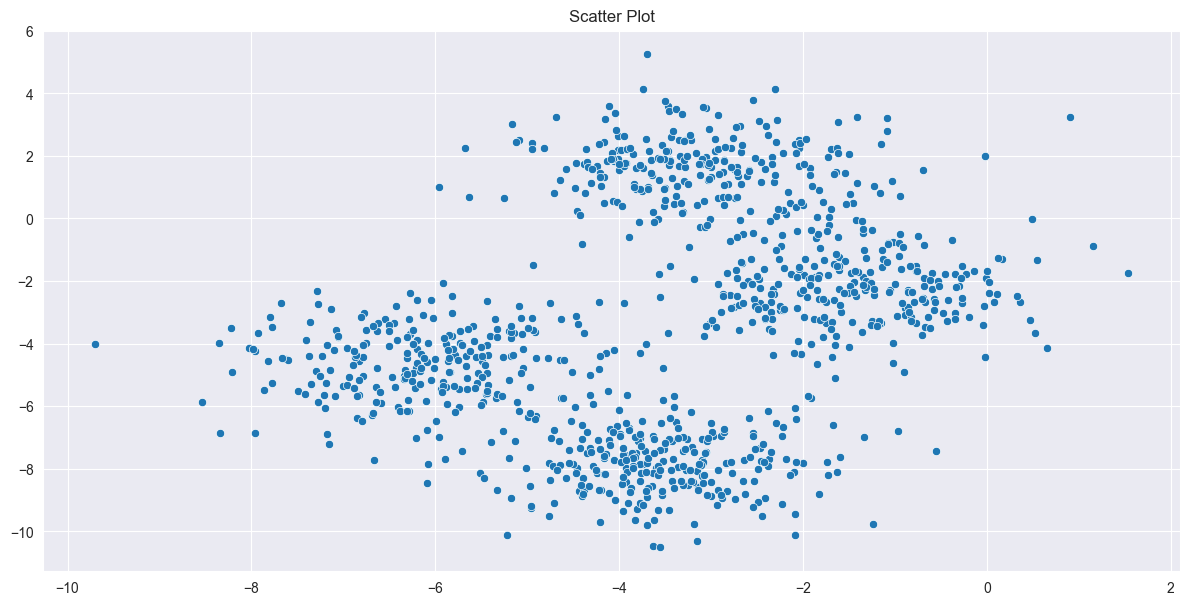

In [12]:
# let us plot the data

plt.figure(figsize=(12,6))
sns.scatterplot(x=X[:,0], y=X[:,1])

plt.tight_layout()
plt.title('Scatter Plot')
plt.show()

In [31]:
# choose the first centroid from the dataset X randomly. 
np.random.seed(2)
centroids = [X[np.random.choice(a=X.shape[0])]] # initialized a list and stored the first centroid in it 

# select the remaining (k-1) centroids 
k = 4
for _ in range(1,k):
    # Compute squared distances from the nearest centroid
    distances = np.array([np.min(np.linalg.norm(x - centroids, axis=1)) for x in X ])
    
    # Compute probabilities for each point to be chosen
    probailities = np.divide(distances , np.sum(distances))
    
    # Select next centroid based on the weighted probability
    next_centroid = X[np.random.choice(a=X.shape[0], 
                                       p=probailities)]
    centroids.append(next_centroid)

centroids = np.array(centroids)

centroids


array([[-6.13613261, -3.077718  ],
       [-4.01041721,  1.91353534],
       [-3.31053281, -8.51148609],
       [-1.2703688 , -1.70669027]])

In [33]:
# rest is same as k-means 
# The loop continues until the centroids stop changing significantly (convergence) or the maximum number of iterations is reached.
for _ in range(100):
    clusters = {i:[] for i in range(k)}
    
    for x in X:
        # Compute the Euclidean distance between each point and all centroids.
        # By setting axis=1, we compute the Euclidean norm row-wise (for each centroid). If we omit axis=1, np.linalg.norm computes the overall matrix norm instead of per-row norms, which is incorrect for our purpose.
        distances = np.linalg.norm(x=x-centroids, axis=1)

        # Assign the point to the nearest centroid.
        closest_centroid = np.argmin(distances)

        # Store the assigned points in a dictionary (clusters).
        clusters[closest_centroid].append(x)
        
    # Update centroids by computing the mean of all points in each cluster. If a cluster has no points, retain the previous centroid.
    new_centroids = np.array([np.mean(clusters[i], axis=0) if clusters[i] else centroids[i] for i in range(k)])
    
    if np.linalg.norm(centroids - new_centroids)**2 < 1e-6:
        break
    
    centroids = new_centroids

In [34]:
# updated centroids
centroids

array([[-6.11410419, -4.56278539],
       [-3.11802707,  1.63755446],
       [-3.56825615, -7.83094184],
       [-1.49519841, -2.28672689]])

<function matplotlib.pyplot.show(close=None, block=None)>

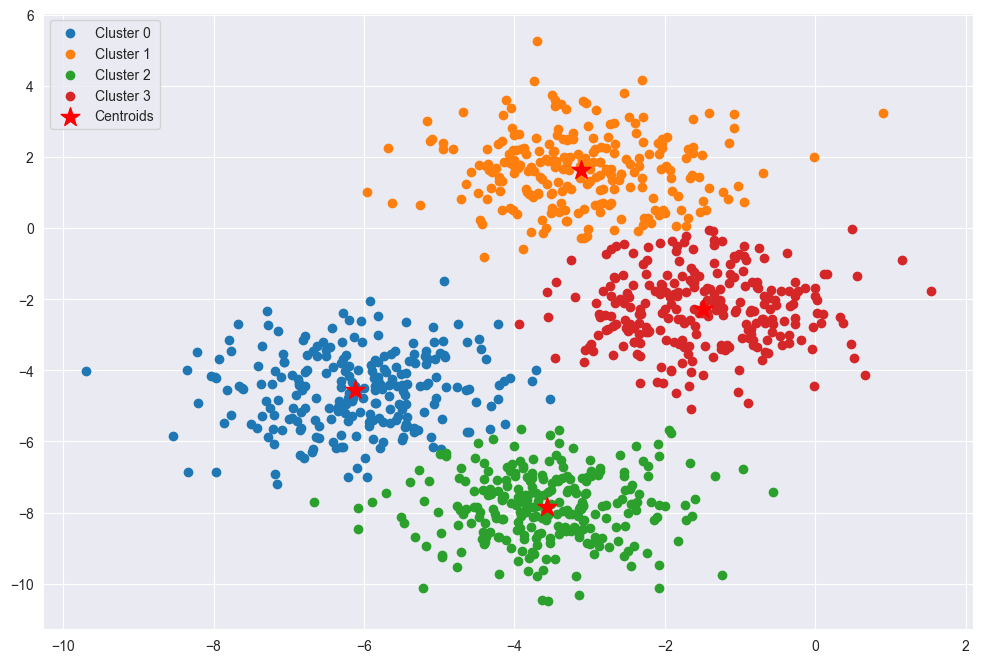

In [35]:
# let us plot 
plt.figure(figsize=(12,8))
for i, cluster in clusters.items():
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=200, label='Centroids')
plt.legend()
plt.show